In [1]:
import numpy as np
import pandas as pd
import datetime
import os
import matplotlib.pyplot as plt
import time

# 1 数据读取
 - 每秒所有采集数据放置在一行，数据间用空格分隔，不同类型数据（例如空间变位的三个方向、风速和风向）之间用逗号分隔

#### 1.1 读入数据

In [7]:
# 读取数据，返回dataframe格式
def readFile(path):
    return pd.read_csv(path)
path = r"..\数据\浦仪夹江大桥数据4.27\主跨跨中竖向加速度LFA-G-V-04.csv"
df = readFile(path)

In [8]:
df.head()

,测点编号,采集时间,加速度
0,LFA-G-V-04,2021-04-27 19:00:00,0.005440981898988996 0.00799138971737453 0.006...
1,LFA-G-V-04,2021-04-27 19:00:01,-0.00897731099809919 -7.68974849155971E-4 0.00...
2,LFA-G-V-04,2021-04-27 19:00:02,-7.172869784491403E-4 0.0027879617043903896 0....
3,LFA-G-V-04,2021-04-27 19:00:03,0.0022783645561763217 0.010036328009196691 0.0...
4,LFA-G-V-04,2021-04-27 19:00:04,-0.0020533131701605664 -0.005288170464336872 -...


In [9]:
df.tail()

,测点编号,采集时间,加速度
162376,LFA-G-V-04,2021-04-29 18:59:40,-0.003249632673604148 1.1848126138959613E-4 0....
162377,LFA-G-V-04,2021-04-29 18:59:41,0.0016428378011499134 0.0012362232697861535 -6...
162378,LFA-G-V-04,2021-04-29 18:59:42,-9.963171822684152E-5 0.0010411364691598076 9....
162379,LFA-G-V-04,2021-04-29 18:59:43,-0.001939457654953003 -0.0018544435501098634 -...
162380,LFA-G-V-04,2021-04-29 18:59:44,-0.0014793668906869636 -0.002895401268532234 -...


#### 1.2  数据校验

In [10]:
# 数据类型转换
def change_datatype(df):
    df["加速度"] = df["加速度"].apply(lambda x: np.array(x.split(" "), dtype = float))
    df["采集时间"] = df["采集时间"].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
    return df
df = change_datatype(df)
df.head()

,测点编号,采集时间,加速度
0,LFA-G-V-04,2021-04-27 19:00:00,"[0.005440981898988996, 0.00799138971737453, 0...."
1,LFA-G-V-04,2021-04-27 19:00:01,"[-0.00897731099809919, -0.000768974849155971, ..."
2,LFA-G-V-04,2021-04-27 19:00:02,"[-0.0007172869784491403, 0.0027879617043903896..."
3,LFA-G-V-04,2021-04-27 19:00:03,"[0.0022783645561763217, 0.010036328009196691, ..."
4,LFA-G-V-04,2021-04-27 19:00:04,"[-0.0020533131701605664, -0.005288170464336872..."


In [11]:
def data_verification(df):
    #统计每秒钟内的采样频率
    df["每秒采样频率"] = df["加速度"].apply(lambda x: len(x))
    print(df["每秒采样频率"].describe() ,"\n")
    
    # 校验每小时漏采或多采的情况
    tmp_Series = df["采集时间"].apply(lambda x: x.strftime("%Y-%m-%d %H时")).value_counts()
    tmp_Series.index = [datetime.datetime.strptime(x[:-1],'%Y-%m-%d %H') for x in tmp_Series.index]
    tmp_Series = tmp_Series - 60*60  #（正常情况下有3600条数据）
    print(tmp_Series)
    tmp_Series = tmp_Series.sort_index()

    plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
    plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
    plt.figure (figsize= (15,4))
    plt.bar(x = tmp_Series.index[:-2], height = tmp_Series.values[:-2], width = 0.041)
    plt.xlabel("Time",fontsize='10')
    plt.ylabel("Bias",fontsize='10')
    plt.title("每小时漏采或多采的情况",fontsize='20')
    plt.plot()

count    162381.000000
mean         19.999920
std           0.029882
min           8.000000
25%          20.000000
50%          20.000000
75%          20.000000
max          20.000000
Name: 每秒采样频率, dtype: float64 

2021-04-29 09:00:00       1
2021-04-28 03:00:00       1
2021-04-28 05:00:00       1
2021-04-28 17:00:00       0
2021-04-28 11:00:00       0
2021-04-29 07:00:00       0
2021-04-29 11:00:00       0
2021-04-29 13:00:00       0
2021-04-28 21:00:00       0
2021-04-28 07:00:00       0
2021-04-29 01:00:00       0
2021-04-28 23:00:00       0
2021-04-28 19:00:00       0
2021-04-29 05:00:00       0
2021-04-28 09:00:00       0
2021-04-28 01:00:00       0
2021-04-27 21:00:00       0
2021-04-29 03:00:00       0
2021-04-28 13:00:00       0
2021-04-27 19:00:00       0
2021-04-28 15:00:00       0
2021-04-27 23:00:00      -1
2021-04-29 10:00:00      -2
2021-04-28 00:00:00      -2
2021-04-28 10:00:00      -2
2021-04-27 22:00:00      -2
2021-04-28 16:00:00      -3
2021-04-29 04:00:00      -3
2

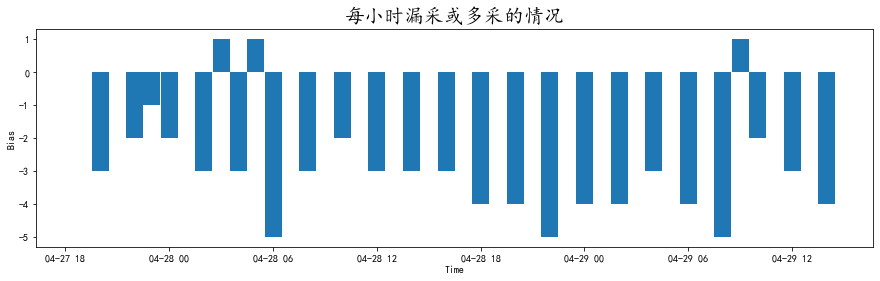

In [12]:
data_verification(df)

 - 采样频率为20，但个别秒存在少采的情况
 - 采样时间以一秒为单位增加，每小时应该存在7200条数据，但实际上存在偏差，特别是4.29日 15点的数据

# 2 数据预处理
 - 针对数据校验的结果，对数据进行进一步处理

#### 2.1 数据展开

In [13]:
df.sort_values(by="采集时间",axis=0,ascending=True,inplace=True)
df.drop_duplicates(subset=['采集时间'], keep='first', inplace=True)
df.reset_index(inplace=True)
del df['index']

In [14]:
df.head()

,测点编号,采集时间,加速度,每秒采样频率
0,LFA-G-V-04,2021-04-27 19:00:00,"[0.005440981898988996, 0.00799138971737453, 0....",20
1,LFA-G-V-04,2021-04-27 19:00:01,"[-0.00897731099809919, -0.000768974849155971, ...",20
2,LFA-G-V-04,2021-04-27 19:00:02,"[-0.0007172869784491403, 0.0027879617043903896...",20
3,LFA-G-V-04,2021-04-27 19:00:03,"[0.0022783645561763217, 0.010036328009196691, ...",20
4,LFA-G-V-04,2021-04-27 19:00:04,"[-0.0020533131701605664, -0.005288170464336872...",20


In [15]:
##############################################################
# @desc: 对数据的每一行进行处理，返回dataframe
##############################################################
def produce_unit(x):
    # 生成时间序列
    time_list = pd.date_range(start=x["采集时间"], periods=20, freq='50ms')
    # 生成加速度序列
    accl_list = x["加速度"]
    if len(accl_list) < 20:
        nan_list = np.full(20-len(accl_list), np.nan)
        accl_list = np.append(accl_list,nan_list)
    return pd.DataFrame({'采集时间':time_list,'加速度':accl_list})
    
##############################################################
# @desc: 对数据的每一行进行处理，返回dataframe
# @dependencies: produce_unit
##############################################################
def prepossessing(df):
    intermediary = df.apply(lambda x: produce_unit(x), axis = 1, result_type = 'reduce')  # intermediary是一个Seriess，但每个数据是一个dataFrame
    result = intermediary[0]   # 初始化
    for i in range(1, len(intermediary)):
        # 判断是否不连续
        intervel = (intermediary[i]["采集时间"][0] - intermediary[i-1]["采集时间"][0]).seconds
        if (intervel > 1):
            adding = pd.DataFrame(
                {'采集时间':pd.date_range(start=intermediary[i-1]["采集时间"][0] + datetime.timedelta(minutes=1), periods=int(intervel -1)*20, freq='50ms'),
                 '加速度':np.full(int(intervel-1)*20, np.nan)
                }
            ) 
            result = pd.concat([result,adding,intermediary[i]])
        else:
            result = pd.concat([result,intermediary[i]])
    result.reset_index(inplace = True)
    del result['index']
    return result

In [16]:
disposed_df = df.copy()
disposed_df = prepossessing(disposed_df)

In [17]:
disposed_df.to_csv('..\数据\浦仪夹江大桥数据4.27\disposed\跨中竖向加速度.csv')

#### 2.2 归一化

In [2]:
disposed_df = pd.read_csv('..\数据\浦仪夹江大桥数据5.4\disposed\跨中竖向加速度.csv',index_col=False)
del disposed_df['Unnamed: 0']

# def normalization(df,columns=[]):
#     for col in columns:
#         df[columns] = df[columns] / (df[columns].max() - df[columns].min())
#     return df

# cols = ['加速度']
# disposed_df = normalization(disposed_df,cols)

In [4]:
disposed_df.head()

,采集时间,加速度
0,2021-05-04 00:00:00.000,0.000454
1,2021-05-04 00:00:00.050,-0.001200
2,2021-05-04 00:00:00.100,0.000062
3,2021-05-04 00:00:00.150,-0.000155
4,2021-05-04 00:00:00.200,-0.000229


#### 2.3 原始数据可视化

Text(0.5, 1.0, '竖向加速度')

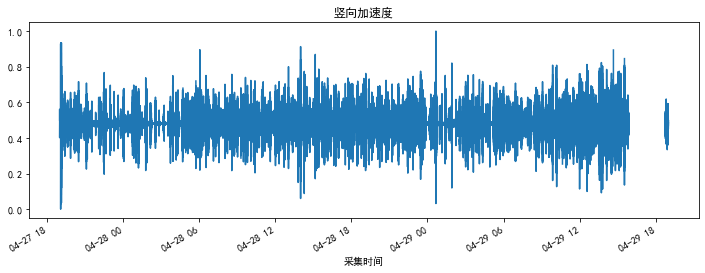

In [5]:
disposed_df['采集时间'] = disposed_df["采集时间"].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S.%f')) 
disposed_df.index = disposed_df['采集时间']

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

disposed_df['加速度'].plot(figsize=(12,4))
plt.title('竖向加速度')

# 3 数据分析

#### 3.1 以十分钟为单位划分数据集
 - 计算窗体时间内的标准差、平均值

In [5]:
############################################################
# @desc：获取窗体时间内的统计值
# @param：
#     df：数据集
#     interval：窗体事件(/s)
############################################################
def get_stats(df, interval = 60*10, freq = 20):
    df["class"] = np.array(df.index.values / (freq*interval), dtype=int)
    result = df.groupby('class').agg({'采集时间':min, '加速度':[np.mean,np.std]}) 
    result.columns = ['采集时间','竖向加速度平均值','竖向加速度标准差']
    return result

In [6]:
stats = get_stats(disposed_df, interval = 60*10, freq = 20)

In [7]:
stats

,采集时间,竖向加速度平均值,竖向加速度标准差
class,,,
0,2021-05-04 00:00:00.000,-9.050184e-07,0.002418
1,2021-05-04 00:10:00.000,1.054820e-06,0.003812
2,2021-05-04 00:20:00.000,-1.285649e-06,0.002596
3,2021-05-04 00:30:00.000,1.401841e-06,0.002172
4,2021-05-04 00:40:00.000,1.703777e-06,0.004827
...,...,...,...
283,2021-05-05 23:10:00.000,-1.190270e-05,0.004787
284,2021-05-05 23:20:01.000,-2.166166e-05,0.007919
285,2021-05-05 23:30:00.000,-1.153232e-05,0.005651


In [8]:
stats.to_csv('..\数据\浦仪夹江大桥数据5.4\processed_data\跨中竖向加速度统计值.csv')